In [60]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler

## Clustering

In [61]:
ccd = ['BRA','IND','GBR']
ind=["EN.POP.DNST","NY.GDP.PCAP.PP.CD"]
mng=["Population density","GDP Per Capita"]

In [62]:
md1  = wb.data.DataFrame(ind[0], ccd, mrv=60).T
md1=md1.fillna(md1.mean())
md1.head()

economy,BRA,GBR,IND
YR1961,8.890894,218.244947,154.595625
YR1962,9.154468,220.104989,157.768993
YR1963,9.424662,221.758360,161.047764
YR1964,9.698877,223.205059,164.418735
YR1965,9.975130,224.643699,167.874683


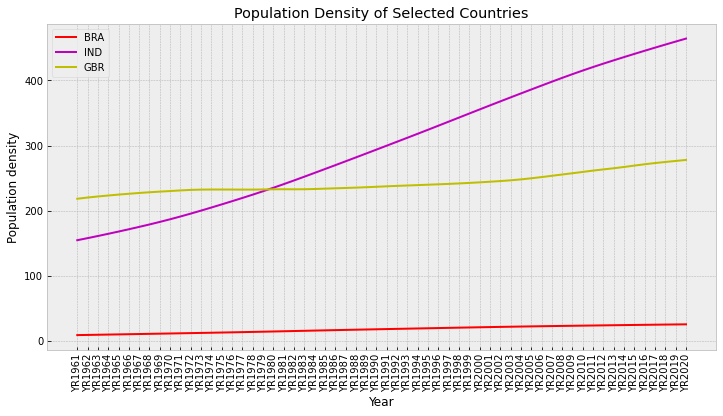

In [63]:
plt.figure(figsize=(12,6))
plt.title('Population Density of Selected Countries')
plt.plot(md1[ccd[0]],"r",label=ccd[0])
plt.plot(md1[ccd[1]],"m",label=ccd[1])
plt.plot(md1[ccd[2]],"y",label=ccd[2])
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("{}".format(mng[0]))
plt.legend()
plt.show()

In [64]:
md2  = wb.data.DataFrame(ind[1], ccd, mrv=30).T
md2=md2.fillna(md2.mean())
md2.head()

economy,BRA,GBR,IND
YR1991,6872.636943,17413.592657,1229.302914
YR1992,6872.666791,17833.573812,1299.945950
YR1993,7260.168864,18666.042904,1366.779103
YR1994,7722.008958,19747.530294,1460.267846
YR1995,8085.722899,20617.432840,1573.332562


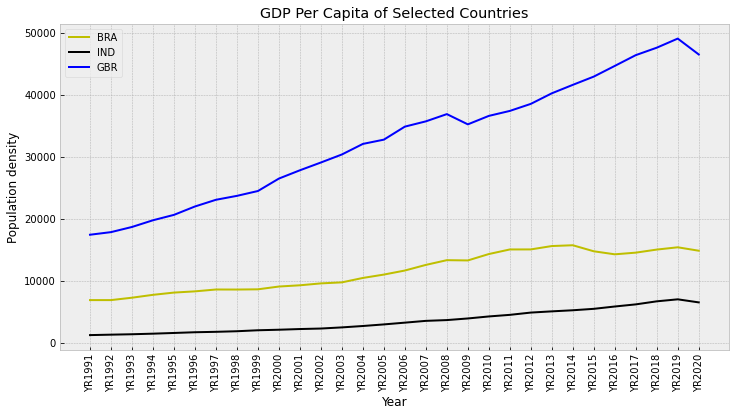

In [65]:
plt.figure(figsize=(12,6))
plt.title('GDP Per Capita of Selected Countries')
plt.plot(md2[ccd[0]],"y",label=ccd[0])
plt.plot(md2[ccd[1]],"k",label=ccd[1])
plt.plot(md2[ccd[2]],"b",label=ccd[2])
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("{}".format(mng[0]))
plt.legend()
plt.show()

In [66]:
def normalization(data):
    minmax=MinMaxScaler()
    nrdta=minmax.fit_transform(data)
    return nrdta
norml=normalization(md1.values)

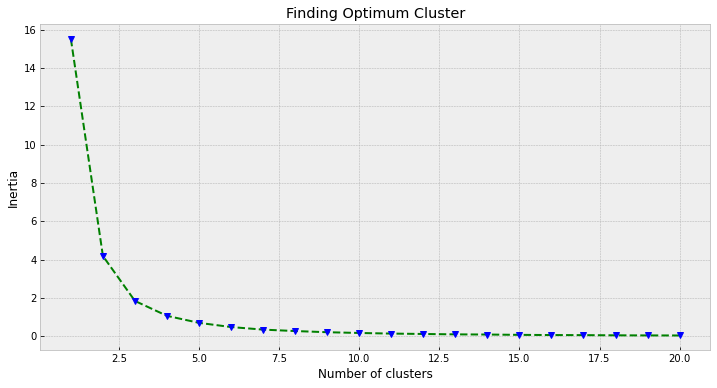

In [67]:
wss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200,  random_state=10)
    kmeans.fit(norml)
    wss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.title('Finding Optimum Cluster')
plt.plot(range(1, 21), wss,"g--")
plt.plot(range(1, 21), wss,"vb")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [68]:
kmeans = KMeans(n_clusters=3, max_iter=100, n_init=50, random_state=0)
pred_y = kmeans.fit(norml)
print("------------------------------------------------------------")
for i in range(len(kmeans.cluster_centers_)):
    print("   Centroid Components for {}th Cluster: {},{},{}".format(i,round(kmeans.cluster_centers_[i][0],3),round(kmeans.cluster_centers_[i][1],3),round(kmeans.cluster_centers_[i][2],3)))
print("------------------------------------------------------------")

------------------------------------------------------------
   Centroid Components for 0th Cluster: 0.623,0.363,0.539
   Centroid Components for 1th Cluster: 0.199,0.185,0.15
   Centroid Components for 2th Cluster: 0.908,0.77,0.88
------------------------------------------------------------


In [69]:
nlst=[]
for i in kmeans.labels_:
    if i==0:
        nlst.append(md1.columns[0])
    elif i==1:
        nlst.append(md1.columns[1])
    elif i==2:
        nlst.append(md1.columns[2])

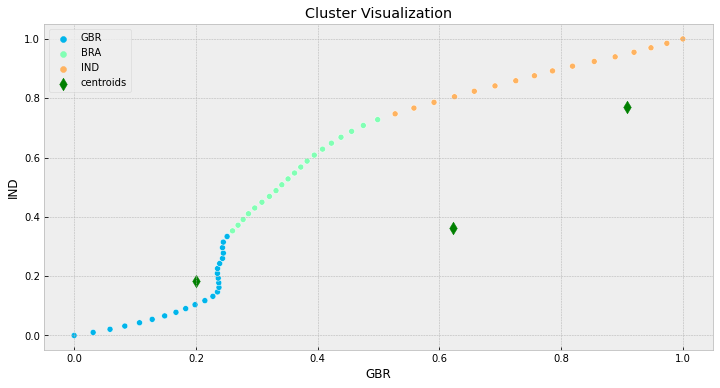

In [70]:
df=pd.DataFrame(norml,columns=md1.columns)
plt.figure(figsize=(12,6))
plt.title('Cluster Visualization')
sns.scatterplot(data=df, x=md1.columns[1], y=md1.columns[2], hue=nlst,palette="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="d", c="g", s=80, label="centroids")
plt.legend()
plt.show()

[0 1 2]


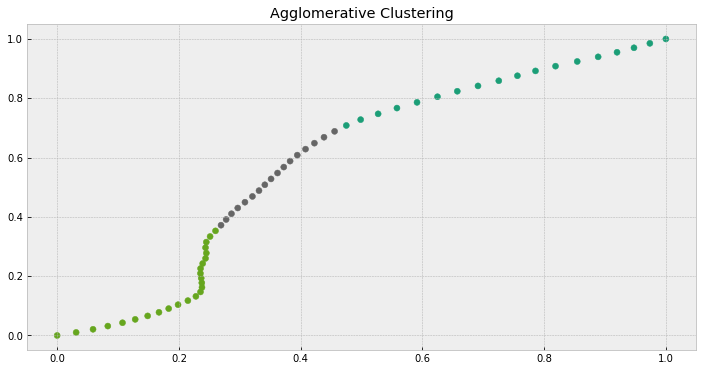

In [71]:
aggl = AgglomerativeClustering(n_clusters=3, affinity='manhattan',linkage='average')
preds = aggl.fit_predict(norml)
clusters = np.unique(preds)
print(clusters)
plt.figure(figsize=(12,6))
plt.title('Agglomerative Clustering')
plt.scatter(norml[:,1],norml[:,2], c=aggl.labels_, cmap='Dark2')
plt.show()

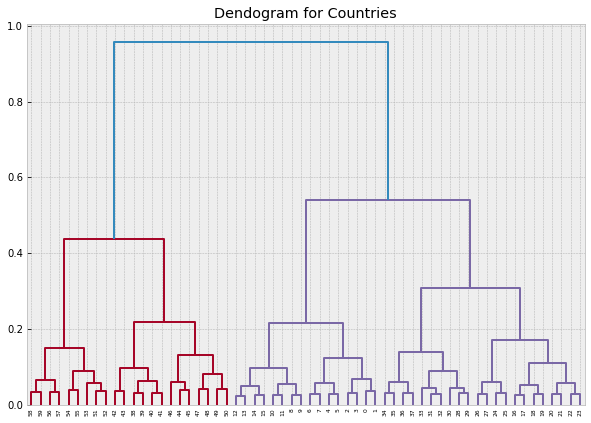

In [72]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram for Countries")
dend = shc.dendrogram(shc.linkage(norml, method='weighted'))

## Curve Fitting

In [73]:
from scipy.optimize import curve_fit

In [74]:
def exponent(x, a, b, c):
    return a * np.exp(-b * x) + c

In [75]:
y = exponent(md2.values[:,1], 1.5, 0.9, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=md2.values[:,1].size)
ydata = y + y_noise

In [76]:
popt, pcov = curve_fit(exponent, md2.values[:,1], ydata)

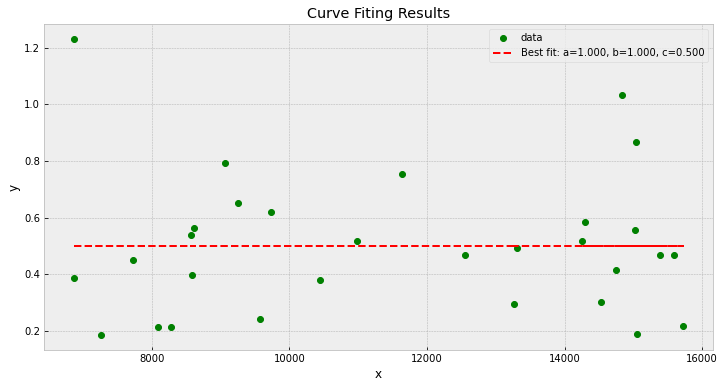

In [77]:
plt.figure(figsize=(12,6))
plt.title('Curve Fiting Results')
plt.plot(md2.values[:,0], ydata, 'go', label='data')
plt.plot(md2.values[:,0], exponent(md2.values[:,0], *popt), 'r--',label='Best fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()